In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rioxarray as rx
from tqdm import tqdm
import seaborn as sns 
import pandas as pd
import xarray as xr
from tqdm import trange, tqdm, tqdm_notebook
from shapely.geometry import Polygon
import cartopy

### For South America (save a DataFrame)

----------------------------------------------------------------------------------------------

### For Africa (save a DataFrame)

-----------------------------------------------------------------------------------------

### South America

In [2]:
## Dataframe for South America
#RZS_TC = pd.read_pickle('/home/chandra/data/Stable_unstable_paper/Dataframe_updated_SA-29.03.2021.pkl')
RZS_TC = pd.read_pickle('/Input_data/Dataframe_updated_SA-29.03.2021.pkl')

In [3]:
len(RZS_TC)

1000000

In [4]:
## Area under the curve for tree cover change based on Supplementary Fig. 7
bin_size = 3000
stable_st = 0.382 # That is 38.2% of all the defined bins
unstable_st = 0.134

In [5]:
## Removing human-influenced land use
for classes in [11,14,20,30,190,200,210,220]:
    RZS_TC = RZS_TC[RZS_TC.Landuse != int(classes)]

Text(0.5, 1.0, 'Density Scatter plot')

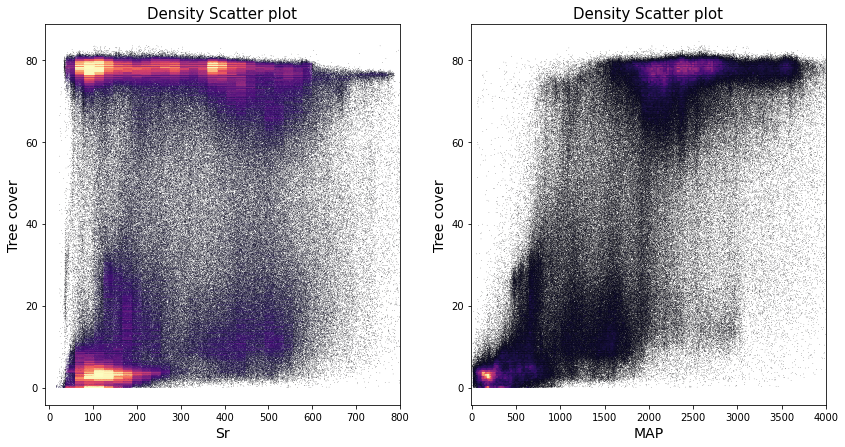

In [6]:
fig = plt.figure(figsize=(14,7))
ax = [plt.subplot(121), plt.subplot(122)]

x = np.array(RZS_TC['Sr'])
y = np.array(RZS_TC['Mean_Treecover'])

#histogram definition
bins = [500, 500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]
ax[0].scatter(x2, y2, c=z2, cmap='magma', marker='.', s = 1, vmin = 0, vmax = 500, edgecolors='none')  
ax[0].set_ylabel('Tree cover', fontsize = '14')
ax[0].set_xlabel('Sr', fontsize = '14')  ##Change
ax[0].set_xlim(-10,800)
ax[0].set_title('Density Scatter plot', fontsize = '15')
#---------------------------------------------------------------------------------------------


x = np.array(RZS_TC['MAP'])
y = np.array(RZS_TC['Mean_Treecover'])

#histogram definition
bins = [500, 500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]
ax[1].scatter(x2, y2, c=z2, cmap='magma', marker='.', s = 1, vmin = 0, vmax = 300, edgecolors='none')  
ax[1].set_ylabel('Tree cover', fontsize = '14')
ax[1].set_xlabel('MAP', fontsize = '14')  ##Change
ax[1].set_xlim(-10,4000)
ax[1].set_title('Density Scatter plot', fontsize = '15')

#### Supplementary Fig. 7

In [7]:
std = np.std(RZS_TC['TC_f-i']) 
mean = np.mean(RZS_TC['TC_f-i'])  

print('std: ', std, '|', 'mean: ', mean)
print('mean ± 0.5 std (38.2%): ', mean-0.5*std, ',', mean+0.5*std)
print('mean ± 1.5 std (13.4%): ', mean-1.5*std, ',', mean+1.5*std)

std:  10.814922332763672 | mean:  -0.25627025961875916
mean ± 0.5 std (38.2%):  -5.663731426000595 , 5.151190906763077
mean ± 1.5 std (13.4%):  -16.478653758764267 , 15.966113239526749


/home/chandra/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Δ TC (pp)'), Text(0, 0.5, 'Probibility density')]

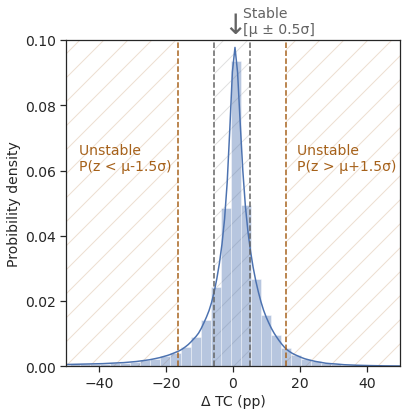

In [8]:
rc = {'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14.0, 
    'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
sns.set(style="ticks", color_codes=True, rc = rc)
plt.figure(figsize=(6,6))

ax = sns.distplot(RZS_TC[['TC_f-i']])
ax.set(xlim=(-50, 50))
ax.set(ylim=(0, 0.1))
ax.plot([mean-0.5*std,mean-0.5*std],[0,1], '--', color = '#636363', )
ax.plot([mean+0.5*std,mean+0.5*std],[0,1], '--', color = '#636363', )
ax.fill_between([mean-0.5*std,mean+0.5*std, mean+0.5*std,mean+0.5*std],1,color="none", hatch="/", edgecolor='#636363', linewidth=0.0, alpha = 0.2, zorder = 0)

ax.text(3,0.102, 'Stable \n[μ ± 0.5σ]', color = '#636363')
ax.text(-3,0.102, '↓', color = '#636363', fontsize = 28)

ax.plot([mean-1.5*std,mean-1.5*std],[0,1], '--', color = '#a6611a', )
ax.plot([mean+1.5*std,mean+1.5*std],[0,1], '--', color = '#a6611a', )
ax.fill_between([-100,mean-1.5*std,mean-1.5*std],1,color="none", hatch="/", edgecolor='#a6611a', linewidth=0.0, alpha = 0.2, zorder = 0)
ax.fill_between([+100,mean-1.5*std,mean+1.5*std],1,color="none", hatch="/", edgecolor='#a6611a', linewidth=0.0, alpha = 0.2, zorder = 0)

ax.text(-46,0.06, 'Unstable \nP(z < μ-1.5σ)', color = '#a6611a')
ax.text(19,0.06, 'Unstable \nP(z > μ+1.5σ)', color = '#a6611a')

#print (np.mean(RZS_TC[['TC_f-i']]), np.std(RZS_TC[['TC_f-i']]))
# ax = sns.boxplot(synData['SYNERGY_SCORE'], orient = 'h') 
# Make a PDF for the normal distribution a function
ax.set(xlabel = '\u0394 TC (pp)', ylabel = 'Probibility density')

### Spatio-temporal approach (South America)

#### Mean Annual Precipitation

In [9]:
TC_bins = np.arange(0,101,1)

#### Equally weigted in 4 classes

In [10]:
pixel_4 = round(len(RZS_TC['MAP'].sort_values())/4)
MAP_bins = []
MAP_bins.append(0)
for i in range(4):
    if i < 3:
        MAP_bins.append(round(RZS_TC['MAP'].sort_values()[pixel_4*i:pixel_4*(i+1)]).max())
    else:
        MAP_bins.append(round(RZS_TC['MAP'].sort_values()[pixel_4*i:].max()))

[Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, ''),
 Text(0, 100.0, '')]

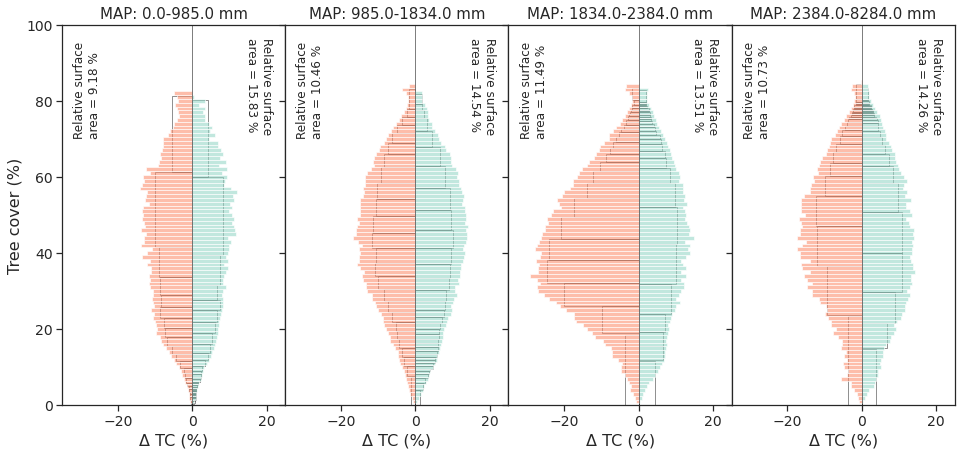

In [11]:
#RZS_TC.Mean_Treecover.where(RZS_TC.Sr < 100).dropna()
TC_bins = np.arange(0,101,1)
MAP_bins = np.array(MAP_bins)

#RZS_TC = RZS_TC.where(RZS_TC['TC_f-i'] !=  0).dropna()

TC_threshold = 0 #if TC_threshold is 2, TC_change greater than 2% would be removed
df_violon = pd.DataFrame()
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(32,7))
ax = [plt.subplot(181), plt.subplot(182), plt.subplot(183), plt.subplot(184)]
fig.subplots_adjust(hspace=0.00)
fig.subplots_adjust(wspace=0.00)

col_names =  ['start_RZ', 'stop_RZ', 'pos_TC', 'neg_TC']
my_df  = pd.DataFrame(columns = col_names) # for counting dataframe in the bins

Unstable_state = np.zeros((2,4,2))
Unstable_state_2 = np.zeros((2,4,2))
Class = pd.DataFrame()

for i in range(4):
    df = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1])).dropna()[['Mean_Treecover','TC_f-i']]
    df_delta_pos = df.where(df['TC_f-i'] >= TC_threshold).dropna()
    df_delta_neg = df.where(df['TC_f-i'] < -TC_threshold).dropna()
    pos = []; neg = []
    for j in range(0,100):
        pos.append(df_delta_pos.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
        neg.append(df_delta_neg.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
    
    df_delta_pos['class'] = 'TC increase'
    df_delta_neg['class'] = 'TC decrease'
    df_delta_pos['bins'] = 'MAP bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_delta_neg['bins'] = 'MAP bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_violon = pd.concat([df_delta_neg,df_delta_pos]).append(df_violon, ignore_index=False)
    
    df_final = pd.DataFrame({'Treecover': TC_bins[1:101], 'Delta_pos': pos, 'Delta_neg': neg})
    x = df_final.Treecover
    negative_data = df_final.Delta_neg
    positive_data = df_final.Delta_pos
    
    append_pos_median = []; append_neg_median = [];
    append_pos_pos = []; append_neg_pos = [];
    append_pos_height = []; append_neg_height = [];
    df_delta_neg = df_delta_neg.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_neg.count()[0],bin_size):
        stop = start+bin_size
        ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), alpha = 0.6, 
            height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='none', edgecolor='k', capsize=2.5, lw = 0.8)
        append_neg_height.append((df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()))
        append_neg_pos.append(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2)
        append_neg_median.append(df_delta_neg[start:stop]['TC_f-i'].median())
        last = df_delta_neg[start:stop]['Mean_Treecover'].max()
        
    df_delta_pos = df_delta_pos.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_pos.count()[0],bin_size):
        stop = start+bin_size
        ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), 
                 alpha = 0.6, height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='none', edgecolor='k', capsize=2.5, lw = 0.8)
        append_pos_height.append((df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()))
        append_pos_pos.append(last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2)
        append_pos_median.append(df_delta_pos[start:stop]['TC_f-i'].median())
        last = df_delta_pos[start:stop]['Mean_Treecover'].max()
    
    Class = Class.append(pd.DataFrame({'y': np.array(append_neg_pos), 'width': np.array(append_neg_median), 'height': np.array(append_neg_height), 'class': 2*i+1}), ignore_index = True)
    Class = Class.append(pd.DataFrame({'y': np.array(append_pos_pos), 'width': np.array(append_pos_median), 'height': np.array(append_pos_height), 'class': 2*i+2}), ignore_index = True)
   
    ## Counting dataframe
    y = {'start_RZ':MAP_bins[i], 'stop_RZ':MAP_bins[i+1], 'pos_TC':df_delta_pos['Mean_Treecover'].count(), 'neg_TC':df_delta_neg['Mean_Treecover'].count()}
    my_df = my_df.append(y, ignore_index=True)
    
    ax[i].barh(x, negative_data, color=color[0], alpha = 0.6, height = 1)
    ax[i].barh(x, positive_data, color=color[1], alpha = 0.6, height = 1)
    ax[i].axvline(x=0, color = 'black', lw = 0.5)
    ax[i].set_ylim(0,100)
    ax[i].set_xlim(-35,25)
    ax[i].set_title('MAP: '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])+' mm', fontsize = '15')
    ax[i].set_xlabel('\u0394 TC (%)', fontsize = '16')
    ax[0].set_ylabel('Tree cover (%)', fontsize = '16') 
    ax[i].tick_params(axis='both', which='major', labelsize=14)
for i in range(4):
    ax[i].text(0.82,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['pos_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation=270, fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest gain (line above)
    ax[i].text(0.05,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['neg_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation='vertical', fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest loss (line above)
ax[0].get_shared_y_axes().join(ax[0], ax[1], ax[2], ax[3])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])

In [12]:
n_unstable = round(Class.shape[0]*unstable_st)
n_stable = round(Class.shape[0]*stable_st)

Class['abs_width'] = Class.width.abs()

Class_unstable = Class.sort_values('abs_width', ascending=False).head(n_unstable)

Class_stable = Class.sort_values('abs_width').head(n_stable)

In [13]:
n_stable_value_l50 = []
n_stable_value_m50 = []
for i in range(1,9):
    n_stable_value_l50.append(Class_stable.where((Class_stable['y'] <= 50) & (Class_stable['class'] == i)).count()[0])
    n_stable_value_m50.append(Class_stable.where((Class_stable['y'] > 50) & (Class_stable['class'] == i)).count()[0])
    
n_stable_value_l50 = np.array(n_stable_value_l50)
n_stable_value_m50 = np.array(n_stable_value_m50)

#### Fig. 2a

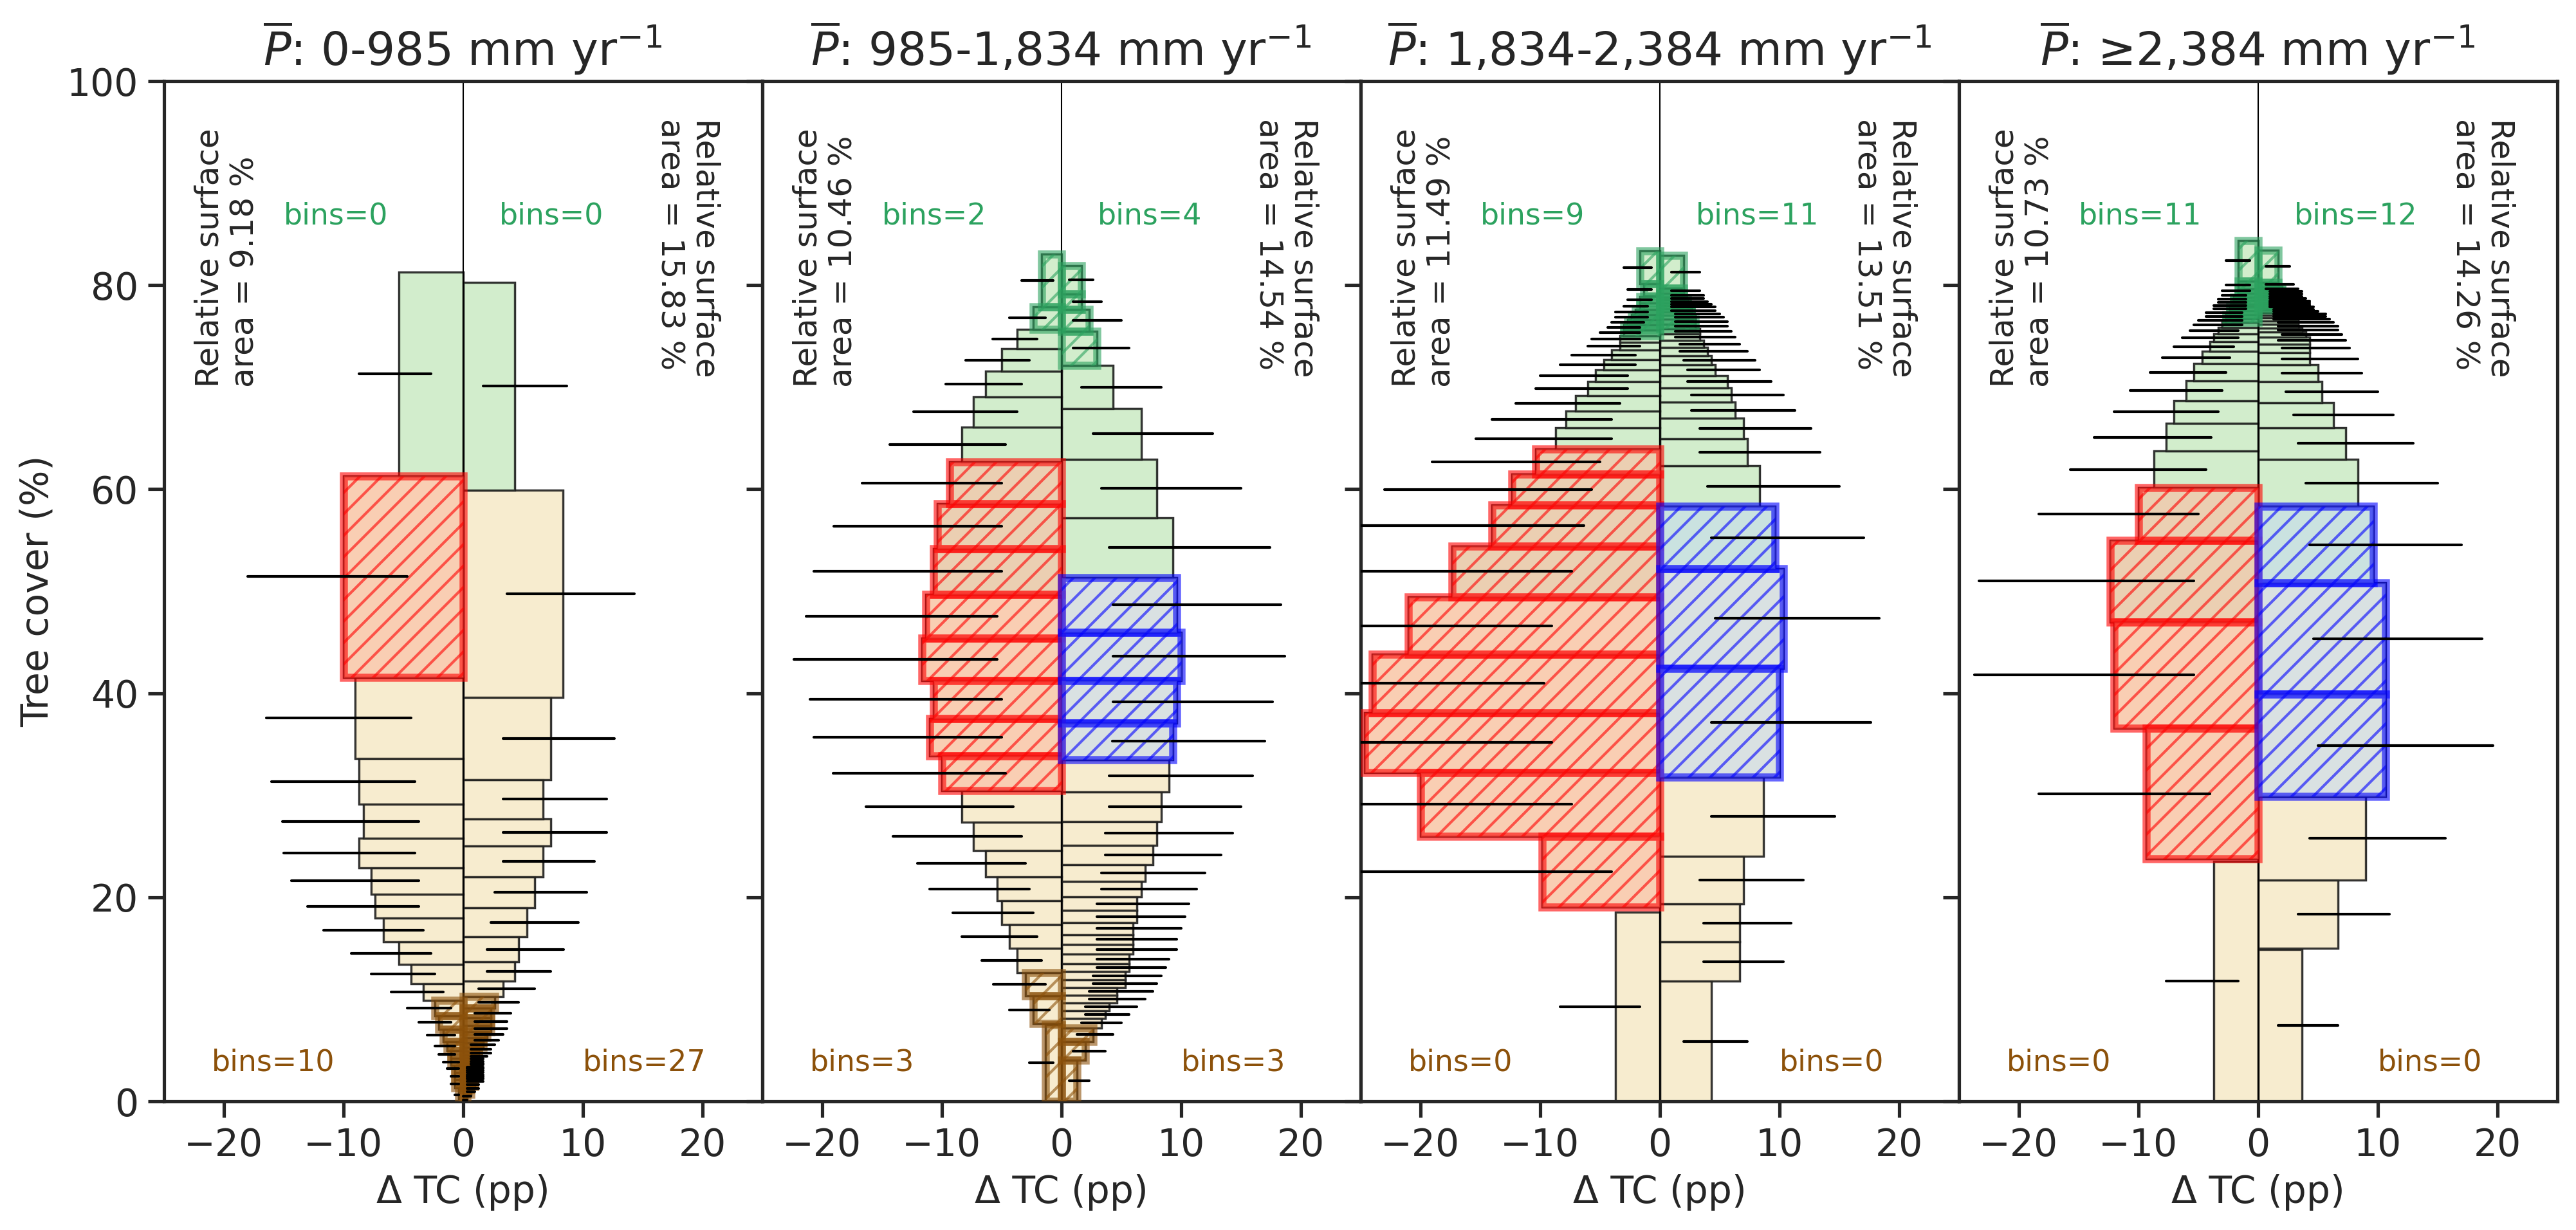

In [14]:
#for 38.2-13.8%
#TC_threshold = 0 #if TC_threshold is 2, TC_change less than 2% and greater than -2% would be removed
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(32,7), dpi = 300)
ax = [plt.subplot(181), plt.subplot(182), plt.subplot(183), plt.subplot(184, sharey = ax[0])]
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.0)

for i in range(4):
    ax[i].barh(y = Class.y.where(Class['class'] == 2*i+1).dropna(), width = Class.width.where(Class['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class.height.where(Class['class'] == 2*i+1).dropna(), color='none', edgecolor='k', capsize=2.5, lw = 0.8)
    ax[i].barh(y = Class.y.where(Class['class'] == 2*i+2).dropna(), width = Class.width.where(Class['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class.height.where(Class['class'] == 2*i+2).dropna(), color='none', edgecolor='k', capsize=2.5, lw = 0.8)
    
    ax[i].barh(y = Class_unstable.y.where(Class_unstable['class'] == 2*i+1).dropna(), width = Class_unstable.width.where(Class_unstable['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class_unstable.height.where(Class_unstable['class'] == 2*i+1).dropna(), edgecolor='red', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5, facecolor='#fcbba1')
    ax[i].barh(y = Class_unstable.y.where(Class_unstable['class'] == 2*i+2).dropna(), width = Class_unstable.width.where(Class_unstable['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class_unstable.height.where(Class_unstable['class'] == 2*i+2).dropna(), edgecolor='blue', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5, facecolor='#c6dbef')
    
    #ax[i].barh(y = Class_stable.y.where(Class_stable['class'] == 2*i+1).dropna(), width = Class_stable.width.where(Class_stable['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class_stable.height.where(Class_stable['class'] == 2*i+1).dropna(), edgecolor='green', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    #ax[i].barh(y = Class_stable.y.where(Class_stable['class'] == 2*i+2).dropna(), width = Class_stable.width.where(Class_stable['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class_stable.height.where(Class_stable['class'] == 2*i+2).dropna(), edgecolor='green', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] <= 50) & (Class_stable['class'] == 2*i+1)).dropna(), width = Class_stable.width.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+1)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+1)).dropna(), edgecolor='#8c510a', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] <= 50) & (Class_stable['class'] == 2*i+2)).dropna(), width = Class_stable.width.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+2)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+2)).dropna(), edgecolor='#8c510a', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), width = Class_stable.width.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), edgecolor='#2ca25f', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), width = Class_stable.width.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), edgecolor='#2ca25f', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    
    ax[i].set_ylim(0,100)
    ax[i].set_xlim(-25,25)
    ax[i].axvline(x=0, color = 'black', lw = 0.5)
    ax[i].set_xlabel('\u0394 TC (pp)', fontsize = '14')
    ax[0].set_ylabel('Tree cover (%)', fontsize = '14') 
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    if i==3:
        ax[i].set_title(r'$\overline{P}$'+': ≥'+str(format(int(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$', fontsize = '17')
    else:
        ax[i].set_title(r'$\overline{P}$'+': '+str(format(int(MAP_bins[i]),','))+'-'+str(format(int(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$', fontsize = '17')

for i in range(4):
    ax[i].text(0.82,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['pos_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation=270, fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest gain (line above)
    ax[i].text(0.05,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['neg_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation='vertical', fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')

ax[0].get_shared_y_axes().join(ax[0], ax[1], ax[2], ax[3])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])

for i in range(4):
    ax[i].text(-21,3,'bins='+str(n_stable_value_l50[2*i]),color = '#8c510a', fontsize = '11')
    ax[i].text(10,3,'bins='+str(n_stable_value_l50[2*i+1]), fontsize = '11',color = '#8c510a')
    ax[i].text(-15,86,'bins='+str(n_stable_value_m50[2*i]),color = '#2ca25f', fontsize = '11')
    ax[i].text(3,86,'bins='+str(n_stable_value_m50[2*i+1]), fontsize = '11',color = '#2ca25f')


for i in range(4):
    df = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1])).dropna()[['Mean_Treecover','TC_f-i']]
    df_delta_pos = df.where(df['TC_f-i'] >= TC_threshold).dropna()
    df_delta_neg = df.where(df['TC_f-i'] < -TC_threshold).dropna()
    pos = []; neg = []
    for j in range(0,100):
        pos.append(df_delta_pos.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
        neg.append(df_delta_neg.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
    
    df_delta_pos['class'] = 'TC increase'
    df_delta_neg['class'] = 'TC decrease'
    df_delta_pos['bins'] = 'Sr bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_delta_neg['bins'] = 'Sr bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_violon = pd.concat([df_delta_neg,df_delta_pos]).append(df_violon, ignore_index=False)
    
    df_final = pd.DataFrame({'Treecover': TC_bins[1:101], 'Delta_pos': pos, 'Delta_neg': neg})
    x = df_final.Treecover
    negative_data = df_final.Delta_neg
    positive_data = df_final.Delta_pos
    
    df_delta_pos = df_delta_pos.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    append_pos_median = []; append_neg_median = [];
    append_pos_pos = []; append_neg_pos = [];
    append_pos_height = []; append_neg_height = [];
    for start in np.arange(0,df_delta_pos.count()[0],bin_size):
        stop = start+bin_size
        if df_delta_pos[start:stop]['Mean_Treecover'].median() > 50:
            ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='#c7e9c0', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        else:
            ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='#f6e8c3', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        ax[i].plot([(df_delta_pos[start:stop]['TC_f-i']).quantile(0.25),(df_delta_pos[start:stop]['TC_f-i']).quantile(0.75)], 
                 [last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2,
                  last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2], color = 'black', lw = 1, zorder = 9)
        append_pos_height.append((df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()))
        append_pos_pos.append(last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2)
        append_pos_median.append(df_delta_pos[start:stop]['TC_f-i'].median())
        last = df_delta_pos[start:stop]['Mean_Treecover'].max()
        
    df_delta_neg = df_delta_neg.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_neg.count()[0],bin_size):
        stop = start+bin_size
        if df_delta_neg[start:stop]['Mean_Treecover'].median() > 50:
            ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='#c7e9c0', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        else:
            ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='#f6e8c3', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        ax[i].plot([(df_delta_neg[start:stop]['TC_f-i']).quantile(0.25),(df_delta_neg[start:stop]['TC_f-i']).quantile(0.75)], 
                 [last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
                  last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2], color = 'black', lw = 1, zorder = 9)
        append_neg_height.append((df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()))
        append_neg_pos.append(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2)
        append_neg_median.append(df_delta_neg[start:stop]['TC_f-i'].median())
        last = df_delta_neg[start:stop]['Mean_Treecover'].max()

#### Fig. 3a

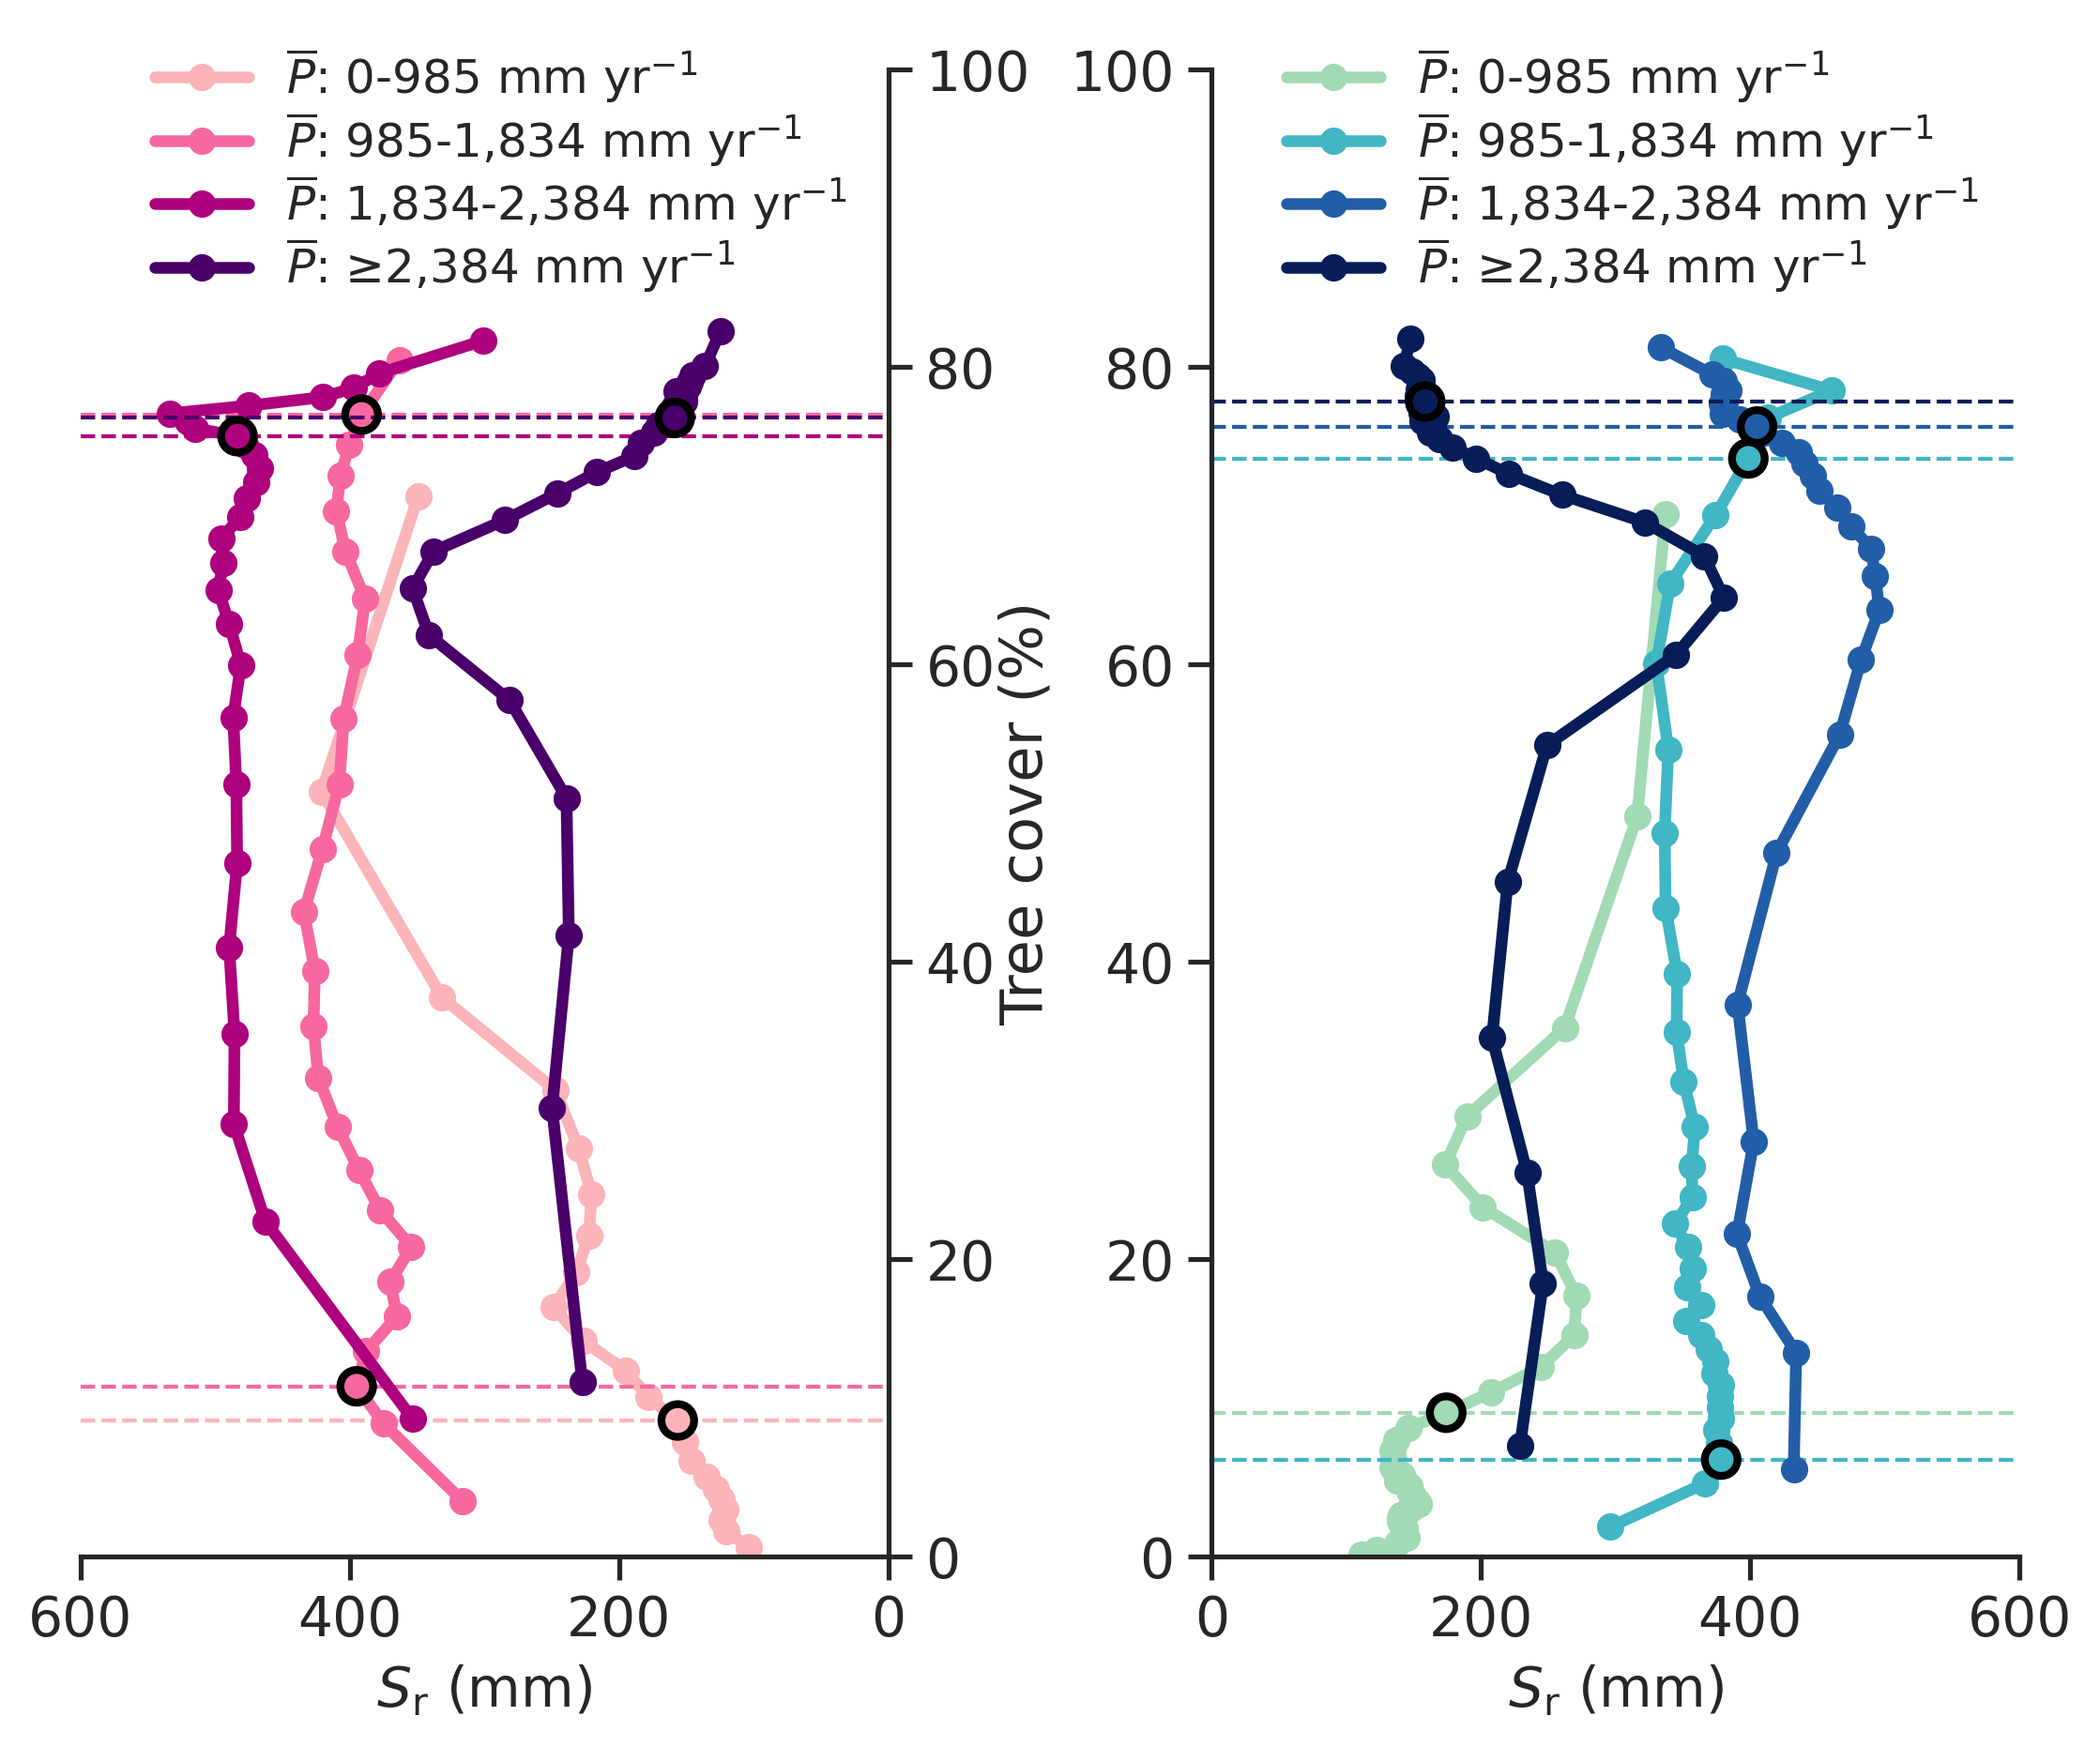

In [15]:
#for 38.2-13.8%
import matplotlib as mpl
import math
TC_threshold = 0 #if TC_threshold is 2, TC_change less than 2% and greater than -2% would be removed
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(40,7), dpi = 300)
ax = [plt.subplot(181), plt.subplot(182, sharey = ax[0])]
fig.subplots_adjust(wspace=0.4)

color_l = ['#fbb4b9','#f768a1','#ae017e','#49006a']
color_g = ['#a1dab4','#41b6c4','#225ea8','#081d58']
    
for i in range(4):
    #----------
    dataframe = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1]) & (RZS_TC['TC_f-i'] < 0)).dropna()[['Mean_Treecover','Sr','MAP','TC_f-i']].sort_values(['Mean_Treecover'])
    a = np.insert(np.array(np.cumsum(Class.height.where(Class['class'] == 2*i+1).dropna())),0,0)
    Sr_append = []
    for j in range(len(a)-1):
        Sr_append.append(dataframe.Sr.where((dataframe.Mean_Treecover>=a[j]) &(dataframe.Mean_Treecover<a[j+1]) & (dataframe.MAP >= MAP_bins[i]) & (dataframe.MAP < MAP_bins[i+1])).dropna().median())
    if i == 3:
        ax[0].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+1).dropna(), lw=3, marker = 'o', color = color_l[i], label= r'$\overline{P}$'+': ≥'+str(format(math.trunc(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    else:
        ax[0].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+1).dropna(), lw=3, marker = 'o', color = color_l[i], label= r'$\overline{P}$'+': '+str(format(math.trunc(MAP_bins[i]),','))+'-'+str(format(math.trunc(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    ax[0].set_xlim(0,600)
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    ax[0].set_ylim(0,100)
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[0].set_xlabel(r'$S_{\mathrm{r}}$'+' (mm)', fontsize = '14')
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    df_temp = pd.DataFrame({'Sr':np.array(Sr_append).flatten(), 'TC': np.array(Class.y.where(Class['class'] == 2*i+1).dropna()).flatten()})
    
    df_l50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+1) & (Class_stable['y'] < 50)).dropna()
    if np.isnan(df_l50.y.max()) == False:
        ax[0].axhline(df_l50.y.max(), color = color_l[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_l50.y.max()).dropna())[0]
        ax[0].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
        
    df_g50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+1) & (Class_stable['y'] > 50)).dropna()
    if np.isnan(df_g50.y.min()) == False:
        ax[0].axhline(df_g50.y.min(), color = color_l[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_g50.y.min()).dropna())[0]
        ax[0].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
    
    #----------
    dataframe_1 = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1]) & (RZS_TC['TC_f-i'] >= 0)).dropna()[['Mean_Treecover','Sr','MAP','TC_f-i','Sr_ERA5_1999', 'Sr_ERA5_2019']].sort_values(['Mean_Treecover'])
    a = np.insert(np.array(np.cumsum(Class.height.where(Class['class'] == 2*i+2).dropna())),0,0)
    Sr_append = []
    for j in range(len(a)-1):
        Sr_append.append(dataframe_1.Sr.where((dataframe_1.Mean_Treecover>=a[j]) &(dataframe_1.Mean_Treecover<a[j+1]) & (dataframe_1.MAP >= MAP_bins[i]) & (dataframe_1.MAP < MAP_bins[i+1])).dropna().median())
    if i == 3:
        ax[1].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+2).dropna(), lw=3, marker = 'o', color = color_g[i], label= r'$\overline{P}$'+': ≥'+str(format(math.trunc(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    else:
        ax[1].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+2).dropna(), lw=3, marker = 'o', color = color_g[i], label= r'$\overline{P}$'+': '+str(format(math.trunc(MAP_bins[i]),','))+'-'+str(format(math.trunc(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    ax[1].set_xlim(0,600)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[1].set_xlabel(r'$S_{\mathrm{r}}$'+' (mm)', fontsize = '14')
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_ylim(0,100)
    
    df_temp = pd.DataFrame({'Sr':np.array(Sr_append).flatten(), 'TC': np.array(Class.y.where(Class['class'] == 2*i+2).dropna()).flatten()})
    
    df_l50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+2) & (Class_stable['y'] < 50)).dropna()
    if np.isnan(df_l50.y.max()) == False:
        ax[1].axhline(df_l50.y.max(), color = color_g[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_l50.y.max()).dropna())[0]
        ax[1].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
        
    df_g50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+2) & (Class_stable['y'] > 50)).dropna()
    if np.isnan(df_g50.y.min()) == False:
        ax[1].axhline(df_g50.y.min(), color = color_g[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_g50.y.min()).dropna())[0]
        ax[1].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
    
ax[1].set_ylabel('Tree cover (%)', fontsize = '15')
leg = ax[0].legend(bbox_to_anchor=(0.04, 0.82, 1., .102), fontsize = '12',labelspacing=0.1)
leg.get_frame().set_linewidth(0.0)
leg = ax[1].legend(bbox_to_anchor=(0.04, 0.82, 1., .102), fontsize = '12',labelspacing=0.1)
leg.get_frame().set_linewidth(0.0)

### Africa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rioxarray as rx
from tqdm import tqdm
import seaborn as sns 
import pandas as pd
import xarray as xr
from tqdm import trange, tqdm, tqdm_notebook
from shapely.geometry import Polygon
import cartopy

In [2]:
## Area under the curve for tree cover change based on Supplementary Fig. 7
bin_size = 3000
stable_st = 0.382 # That is 30% of all the defined bins
unstable_st = 0.134

In [3]:
#RZS_TC = pd.read_pickle('/home/chandra/data/Stable_unstable_paper/Dataframe_updated_AF-29.03.2021.pkl')
RZS_TC = pd.read_pickle('/Input_data/Dataframe_updated_AF-29.03.2021.pkl')

In [4]:
len(RZS_TC) #600000 after the land-use filtering

1000000

In [5]:
for classes in [11,14,20,30,190,200,210,220,230]:
    RZS_TC = RZS_TC[RZS_TC.Landuse != int(classes)]

Text(0.5, 1.0, 'Density Scatter plot')

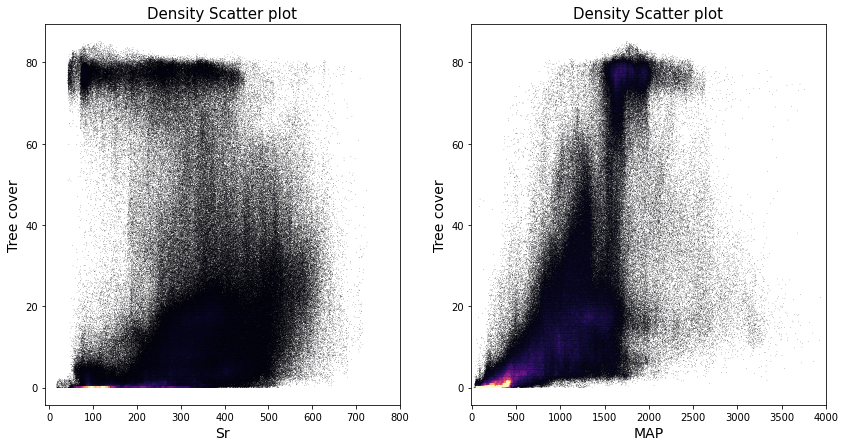

In [6]:
fig = plt.figure(figsize=(14,7))
ax = [plt.subplot(121), plt.subplot(122)]

x = np.array(RZS_TC['Sr'])
y = np.array(RZS_TC['Mean_Treecover'])

#histogram definition
bins = [500, 500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]
ax[0].scatter(x2, y2, c=z2, cmap='magma', marker='.', s = 1, vmin = 0, vmax = 500, edgecolors='none')  
ax[0].set_ylabel('Tree cover', fontsize = '14')
ax[0].set_xlabel('Sr', fontsize = '14')  ##Change
ax[0].set_xlim(-10,800)
ax[0].set_title('Density Scatter plot', fontsize = '15')
#---------------------------------------------------------------------------------------------


x = np.array(RZS_TC['MAP'])
y = np.array(RZS_TC['Mean_Treecover'])

#histogram definition
bins = [500, 500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]
ax[1].scatter(x2, y2, c=z2, cmap='magma', marker='.', s = 1, vmin = 0, vmax = 300, edgecolors='none')  
ax[1].set_ylabel('Tree cover', fontsize = '14')
ax[1].set_xlabel('MAP', fontsize = '14')  ##Change
ax[1].set_xlim(-10,4000)
ax[1].set_title('Density Scatter plot', fontsize = '15')

In [292]:
TC_bins = np.arange(0,101,1)

#### Equally weigted in 4 classes

In [7]:
pixel_4 = round(len(RZS_TC['MAP'].sort_values())/4)
MAP_bins = []
MAP_bins.append(0)
for i in range(4):
    if i < 3:
        MAP_bins.append(round(RZS_TC['MAP'].sort_values()[pixel_4*i:pixel_4*(i+1)]).max())
    else:        MAP_bins.append(round(RZS_TC['MAP'].sort_values()[pixel_4*i:].max()))
print(MAP_bins)

[0, 593.0, 1075.0, 1468.0, 3936]


[Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, ''),
 Text(0, 100.0, '')]

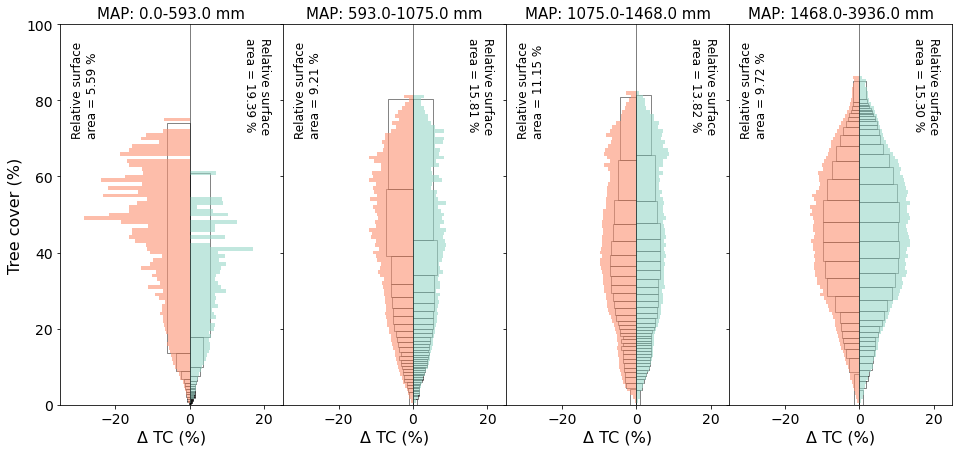

In [8]:
#RZS_TC.Mean_Treecover.where(RZS_TC.Sr < 100).dropna()
TC_bins = np.arange(0,101,1)
MAP_bins = np.array(MAP_bins)

#RZS_TC = RZS_TC.where(RZS_TC['TC_f-i'] !=  0).dropna()

TC_threshold = 0 #if TC_threshold is 2, TC_change greater than 2% would be removed
df_violon = pd.DataFrame()
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(32,7))
ax = [plt.subplot(181), plt.subplot(182), plt.subplot(183), plt.subplot(184)]
fig.subplots_adjust(hspace=0.00)
fig.subplots_adjust(wspace=0.00)

col_names =  ['start_RZ', 'stop_RZ', 'pos_TC', 'neg_TC']
my_df  = pd.DataFrame(columns = col_names) # for counting dataframe in the bins

Unstable_state = np.zeros((2,4,2))
Unstable_state_2 = np.zeros((2,4,2))
Class = pd.DataFrame()

for i in range(4):
    df = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1])).dropna()[['Mean_Treecover','TC_f-i']]
    df_delta_pos = df.where(df['TC_f-i'] >= TC_threshold).dropna()
    df_delta_neg = df.where(df['TC_f-i'] < -TC_threshold).dropna()
    pos = []; neg = []
    for j in range(0,100):
        pos.append(df_delta_pos.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
        neg.append(df_delta_neg.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
    
    df_delta_pos['class'] = 'TC increase'
    df_delta_neg['class'] = 'TC decrease'
    df_delta_pos['bins'] = 'MAP bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_delta_neg['bins'] = 'MAP bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_violon = pd.concat([df_delta_neg,df_delta_pos]).append(df_violon, ignore_index=False)
    
    df_final = pd.DataFrame({'Treecover': TC_bins[1:101], 'Delta_pos': pos, 'Delta_neg': neg})
    x = df_final.Treecover
    negative_data = df_final.Delta_neg
    positive_data = df_final.Delta_pos
    
    append_pos_median = []; append_neg_median = [];
    append_pos_pos = []; append_neg_pos = [];
    append_pos_height = []; append_neg_height = [];
    df_delta_neg = df_delta_neg.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_neg.count()[0],bin_size):
        stop = start+bin_size
        ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), alpha = 0.6, 
            height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='none', edgecolor='k', capsize=2.5, lw = 0.8)
        append_neg_height.append((df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()))
        append_neg_pos.append(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2)
        append_neg_median.append(df_delta_neg[start:stop]['TC_f-i'].median())
        last = df_delta_neg[start:stop]['Mean_Treecover'].max()
        
    df_delta_pos = df_delta_pos.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_pos.count()[0],bin_size):
        stop = start+bin_size
        ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), 
                 alpha = 0.6, height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='none', edgecolor='k', capsize=2.5, lw = 0.8)
        append_pos_height.append((df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()))
        append_pos_pos.append(last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2)
        append_pos_median.append(df_delta_pos[start:stop]['TC_f-i'].median())
        last = df_delta_pos[start:stop]['Mean_Treecover'].max()
    
    Class = Class.append(pd.DataFrame({'y': np.array(append_neg_pos), 'width': np.array(append_neg_median), 'height': np.array(append_neg_height), 'class': 2*i+1}), ignore_index = True)
    Class = Class.append(pd.DataFrame({'y': np.array(append_pos_pos), 'width': np.array(append_pos_median), 'height': np.array(append_pos_height), 'class': 2*i+2}), ignore_index = True)
   
    ## Counting dataframe
    y = {'start_RZ':MAP_bins[i], 'stop_RZ':MAP_bins[i+1], 'pos_TC':df_delta_pos['Mean_Treecover'].count(), 'neg_TC':df_delta_neg['Mean_Treecover'].count()}
    my_df = my_df.append(y, ignore_index=True)
    
    ax[i].barh(x, negative_data, color=color[0], alpha = 0.6, height = 1)
    ax[i].barh(x, positive_data, color=color[1], alpha = 0.6, height = 1)
    ax[i].axvline(x=0, color = 'black', lw = 0.5)
    ax[i].set_ylim(0,100)
    ax[i].set_xlim(-35,25)
    ax[i].set_title('MAP: '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])+' mm', fontsize = '15')
    ax[i].set_xlabel('\u0394 TC (%)', fontsize = '16')
    ax[0].set_ylabel('Tree cover (%)', fontsize = '16') 
    ax[i].tick_params(axis='both', which='major', labelsize=14)
for i in range(4):
    ax[i].text(0.82,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['pos_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation=270, fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest gain (line above)
    ax[i].text(0.05,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['neg_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation='vertical', fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest loss (line above)
ax[0].get_shared_y_axes().join(ax[0], ax[1], ax[2], ax[3])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])

In [9]:
n_unstable = round(Class.shape[0]*unstable_st)
n_stable = round(Class.shape[0]*stable_st)

Class['abs_width'] = Class.width.abs()

Class_unstable = Class.sort_values('abs_width', ascending=False).head(n_unstable)

Class_stable = Class.sort_values('abs_width').head(n_stable)

In [10]:
n_stable_value_l50 = []
n_stable_value_m50 = []
for i in range(1,9):
    n_stable_value_l50.append(Class_stable.where((Class_stable['y'] < 50) & (Class_stable['class'] == i)).count()[0])
    n_stable_value_m50.append(Class_stable.where((Class_stable['y'] > 50) & (Class_stable['class'] == i)).count()[0])
    
n_stable_value_l50 = np.array(n_stable_value_l50)
n_stable_value_m50 = np.array(n_stable_value_m50)

#### Fig. 2c

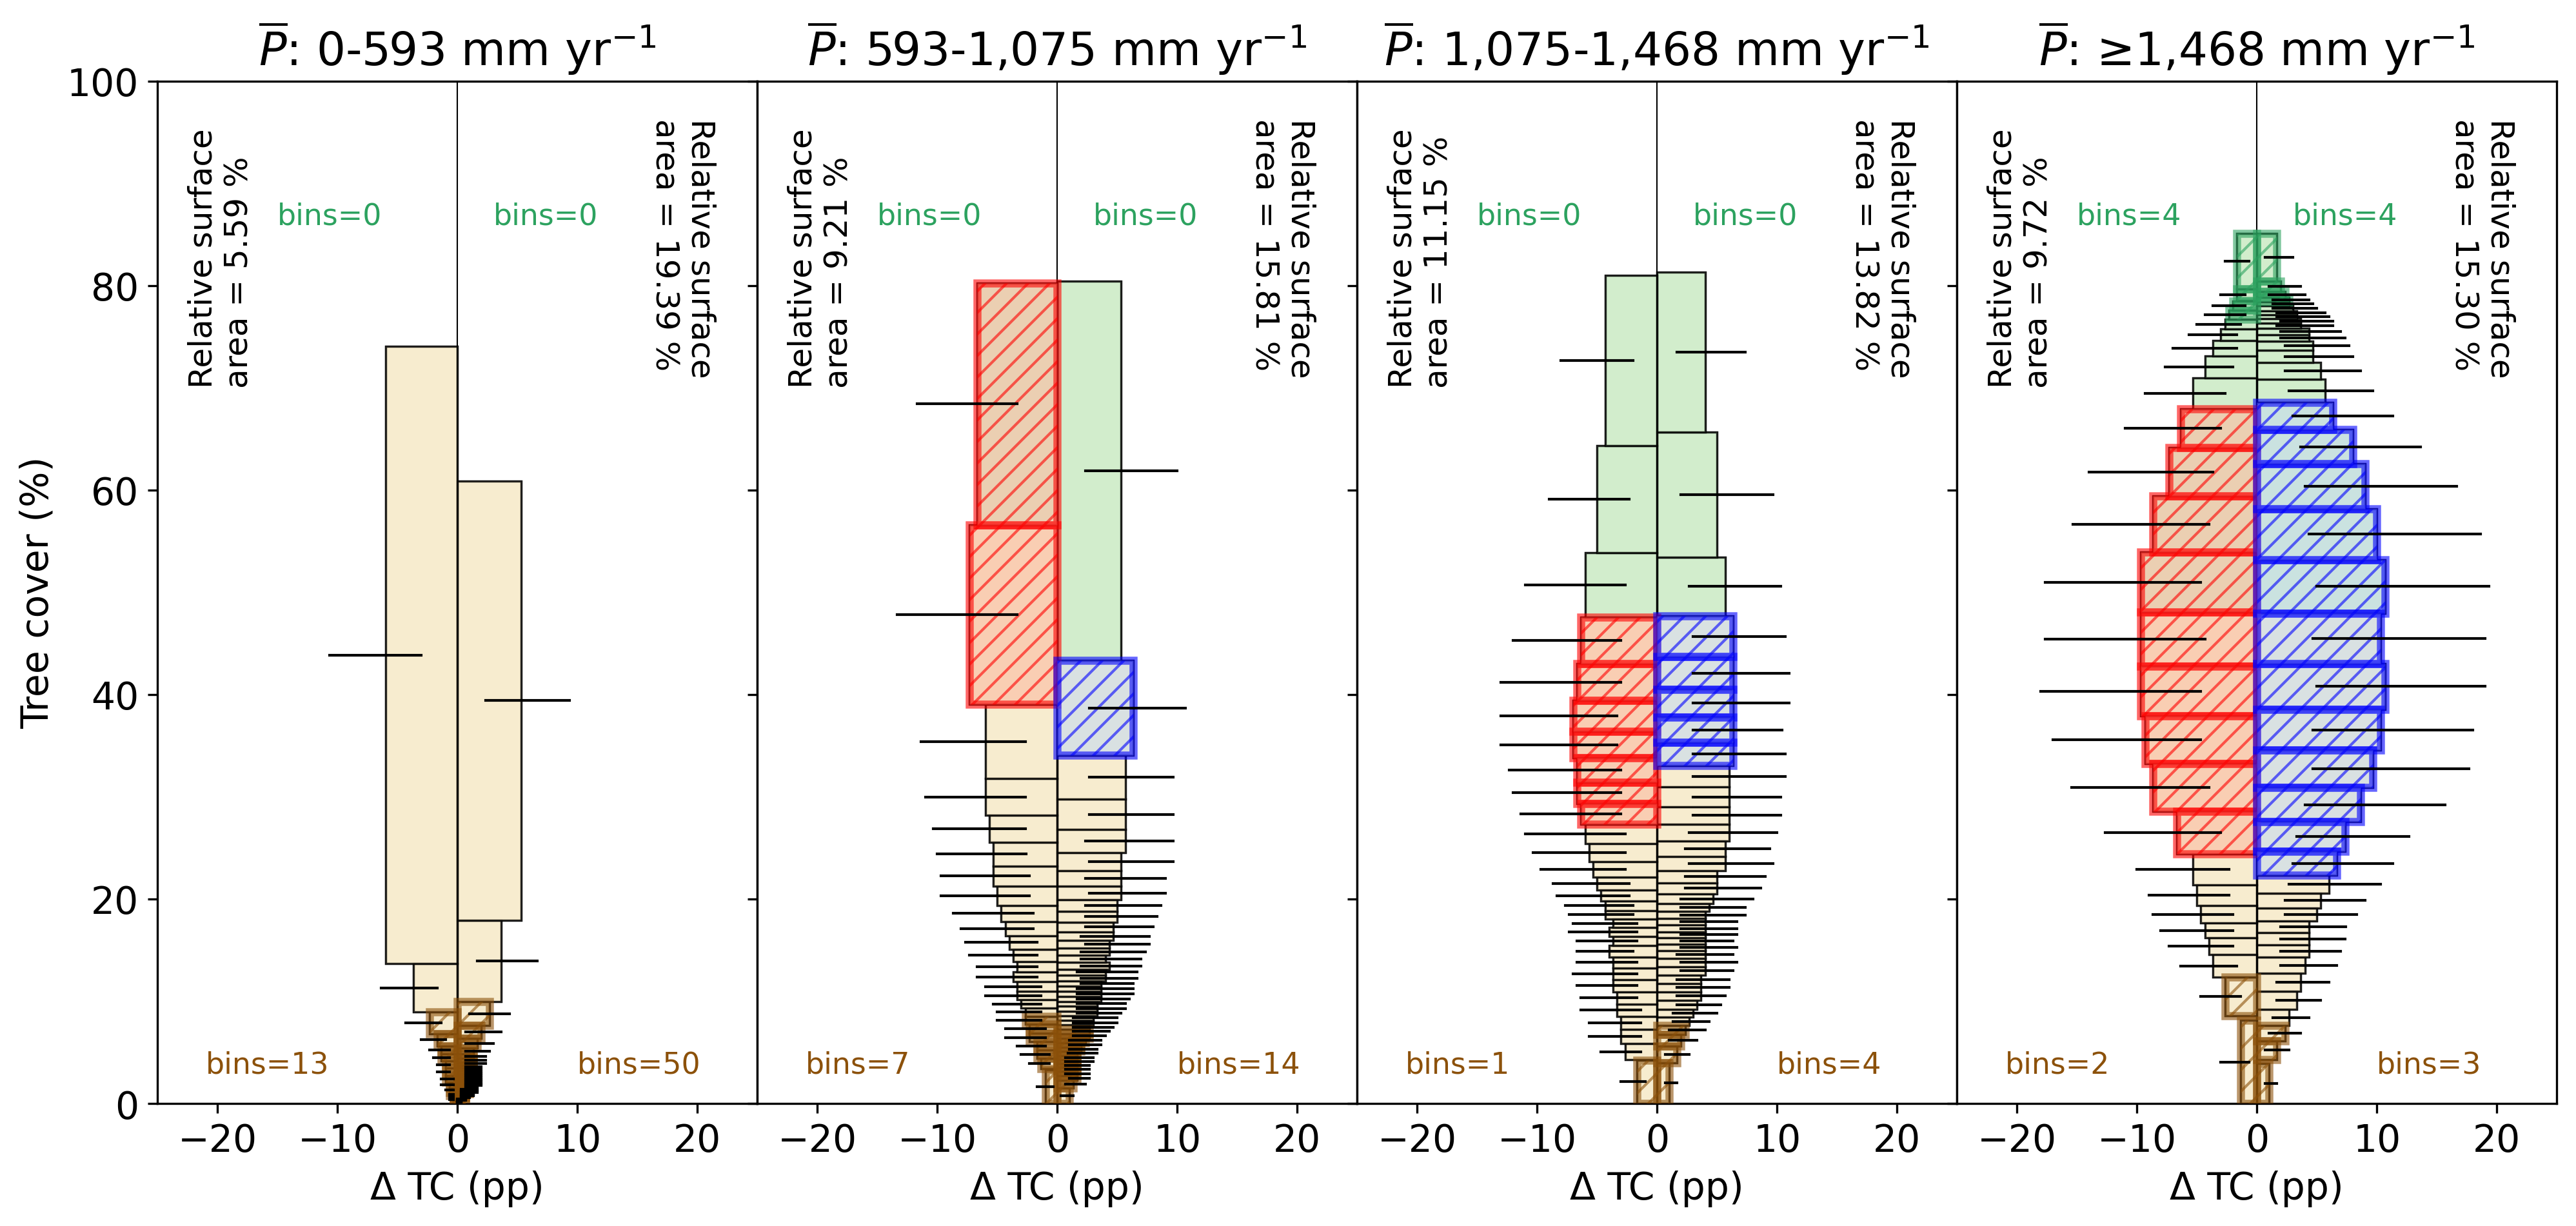

In [11]:
#for 38.2-13.8%
TC_threshold = 0 #if TC_threshold is 2, TC_change less than 2% and greater than -2% would be removed
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(32,7), dpi = 300)
ax = [plt.subplot(181), plt.subplot(182), plt.subplot(183), plt.subplot(184, sharey = ax[0])]
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.0)

for i in range(4):
    ax[i].barh(y = Class.y.where(Class['class'] == 2*i+1).dropna(), width = Class.width.where(Class['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class.height.where(Class['class'] == 2*i+1).dropna(), color='none', edgecolor='k', capsize=2.5, lw = 0.8)
    ax[i].barh(y = Class.y.where(Class['class'] == 2*i+2).dropna(), width = Class.width.where(Class['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class.height.where(Class['class'] == 2*i+2).dropna(), color='none', edgecolor='k', capsize=2.5, lw = 0.8)
    
    ax[i].barh(y = Class_unstable.y.where(Class_unstable['class'] == 2*i+1).dropna(), width = Class_unstable.width.where(Class_unstable['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class_unstable.height.where(Class_unstable['class'] == 2*i+1).dropna(), edgecolor='red', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5, facecolor='#fcbba1')
    ax[i].barh(y = Class_unstable.y.where(Class_unstable['class'] == 2*i+2).dropna(), width = Class_unstable.width.where(Class_unstable['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class_unstable.height.where(Class_unstable['class'] == 2*i+2).dropna(), edgecolor='blue', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5, facecolor='#c6dbef')
    
    #ax[i].barh(y = Class_stable.y.where(Class_stable['class'] == 2*i+1).dropna(), width = Class_stable.width.where(Class_stable['class'] == 2*i+1).dropna(), alpha = 0.6, height = Class_stable.height.where(Class_stable['class'] == 2*i+1).dropna(), edgecolor='green', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    #ax[i].barh(y = Class_stable.y.where(Class_stable['class'] == 2*i+2).dropna(), width = Class_stable.width.where(Class_stable['class'] == 2*i+2).dropna(), alpha = 0.6, height = Class_stable.height.where(Class_stable['class'] == 2*i+2).dropna(), edgecolor='green', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] <= 50) & (Class_stable['class'] == 2*i+1)).dropna(), width = Class_stable.width.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+1)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+1)).dropna(), edgecolor='#8c510a', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] <= 50) & (Class_stable['class'] == 2*i+2)).dropna(), width = Class_stable.width.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+2)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] < 50) & (Class_stable['class'] == 2*i+2)).dropna(), edgecolor='#8c510a', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), width = Class_stable.width.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+1)).dropna(), edgecolor='#2ca25f', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    ax[i].barh(y = Class_stable.y.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), width = Class_stable.width.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), alpha = 0.6, height = Class_stable.height.where((Class_stable['y'] > 50) & (Class_stable['class'] == 2*i+2)).dropna(), edgecolor='#2ca25f', hatch="///", lw=3, zorder = 5, color='none', capsize=2.5)
    
    ax[i].set_ylim(0,100)
    ax[i].set_xlim(-25,25)
    ax[i].axvline(x=0, color = 'black', lw = 0.5)
    ax[i].set_xlabel('\u0394 TC (pp)', fontsize = '14')
    ax[0].set_ylabel('Tree cover (%)', fontsize = '14') 
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    if i==3:
        ax[i].set_title(r'$\overline{P}$'+': ≥'+str(format(int(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$', fontsize = '17')
    else:
        ax[i].set_title(r'$\overline{P}$'+': '+str(format(int(MAP_bins[i]),','))+'-'+str(format(int(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$', fontsize = '17')

for i in range(4):
    ax[i].text(0.82,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['pos_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation=270, fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')
    ## For forest gain (line above)
    ax[i].text(0.05,0.7,'Relative surface \narea = '+"{:.2f}".format((my_df['neg_TC']/((my_df['pos_TC']).sum()+(my_df['neg_TC']).sum())*100)[i])+' %', rotation='vertical', fontsize = '12', transform = ax[i].transAxes, ha='left', va='bottom')

ax[0].get_shared_y_axes().join(ax[0], ax[1], ax[2], ax[3])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])

for i in range(4):
    ax[i].text(-21,3,'bins='+str(n_stable_value_l50[2*i]),color = '#8c510a', fontsize = '11')
    ax[i].text(10,3,'bins='+str(n_stable_value_l50[2*i+1]), fontsize = '11',color = '#8c510a')
    ax[i].text(-15,86,'bins='+str(n_stable_value_m50[2*i]),color = '#2ca25f', fontsize = '11')
    ax[i].text(3,86,'bins='+str(n_stable_value_m50[2*i+1]), fontsize = '11',color = '#2ca25f')

### Just for the percentile bars
#Unstable_state = np.zeros((2,4,2))

#col_names =  ['start_RZ', 'stop_RZ', 'pos_TC', 'neg_TC']
#my_df  = pd.DataFrame(columns = col_names) # for counting dataframe in the bins

for i in range(4):
    df = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1])).dropna()[['Mean_Treecover','TC_f-i']]
    df_delta_pos = df.where(df['TC_f-i'] >= TC_threshold).dropna()
    df_delta_neg = df.where(df['TC_f-i'] < -TC_threshold).dropna()
    pos = []; neg = []
    for j in range(0,100):
        pos.append(df_delta_pos.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
        neg.append(df_delta_neg.where((df.Mean_Treecover >= TC_bins[j]) & (df.Mean_Treecover < TC_bins[j+1])).dropna()['TC_f-i'].mean())
    
    df_delta_pos['class'] = 'TC increase'
    df_delta_neg['class'] = 'TC decrease'
    df_delta_pos['bins'] = 'Sr bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_delta_neg['bins'] = 'Sr bin '+str(MAP_bins[i])+'-'+str(MAP_bins[i+1])
    df_violon = pd.concat([df_delta_neg,df_delta_pos]).append(df_violon, ignore_index=False)
    
    df_final = pd.DataFrame({'Treecover': TC_bins[1:101], 'Delta_pos': pos, 'Delta_neg': neg})
    x = df_final.Treecover
    negative_data = df_final.Delta_neg
    positive_data = df_final.Delta_pos
    
    df_delta_pos = df_delta_pos.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    append_pos_median = []; append_neg_median = [];
    append_pos_pos = []; append_neg_pos = [];
    append_pos_height = []; append_neg_height = [];
    for start in np.arange(0,df_delta_pos.count()[0],bin_size):
        stop = start+bin_size
        if df_delta_pos[start:stop]['Mean_Treecover'].median() > 50:
            ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='#c7e9c0', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        else:
            ax[i].barh((last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2), 
                 df_delta_pos[start:stop]['TC_f-i'].median(), height = (df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()), 
                 color='#f6e8c3', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        ax[i].plot([(df_delta_pos[start:stop]['TC_f-i']).quantile(0.25),(df_delta_pos[start:stop]['TC_f-i']).quantile(0.75)], 
                 [last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2,
                  last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2], color = 'black', lw = 1, zorder = 9)
        append_pos_height.append((df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min()))
        append_pos_pos.append(last+(df_delta_pos[start:stop]['Mean_Treecover'].max()-df_delta_pos[start:stop]['Mean_Treecover'].min())/2)
        append_pos_median.append(df_delta_pos[start:stop]['TC_f-i'].median())
        last = df_delta_pos[start:stop]['Mean_Treecover'].max()
        
    df_delta_neg = df_delta_neg.sort_values(by = ['Mean_Treecover'])
    start = 0
    stop = 0
    last = 0
    k = 0
    for start in np.arange(0,df_delta_neg.count()[0],bin_size):
        stop = start+bin_size
        if df_delta_neg[start:stop]['Mean_Treecover'].median() > 50:
            ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='#c7e9c0', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        else:
            ax[i].barh(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
            df_delta_neg[start:stop]['TC_f-i'].median(), height = (df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()), 
            color='#f6e8c3', edgecolor='k', capsize=2.5, lw = 0.8, alpha = 0.8)
        ax[i].plot([(df_delta_neg[start:stop]['TC_f-i']).quantile(0.25),(df_delta_neg[start:stop]['TC_f-i']).quantile(0.75)], 
                 [last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2,
                  last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2], color = 'black', lw = 1, zorder = 9)
        append_neg_height.append((df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min()))
        append_neg_pos.append(last+(df_delta_neg[start:stop]['Mean_Treecover'].max()-df_delta_neg[start:stop]['Mean_Treecover'].min())/2)
        append_neg_median.append(df_delta_neg[start:stop]['TC_f-i'].median())
        last = df_delta_neg[start:stop]['Mean_Treecover'].max()

#### Fig. 3b

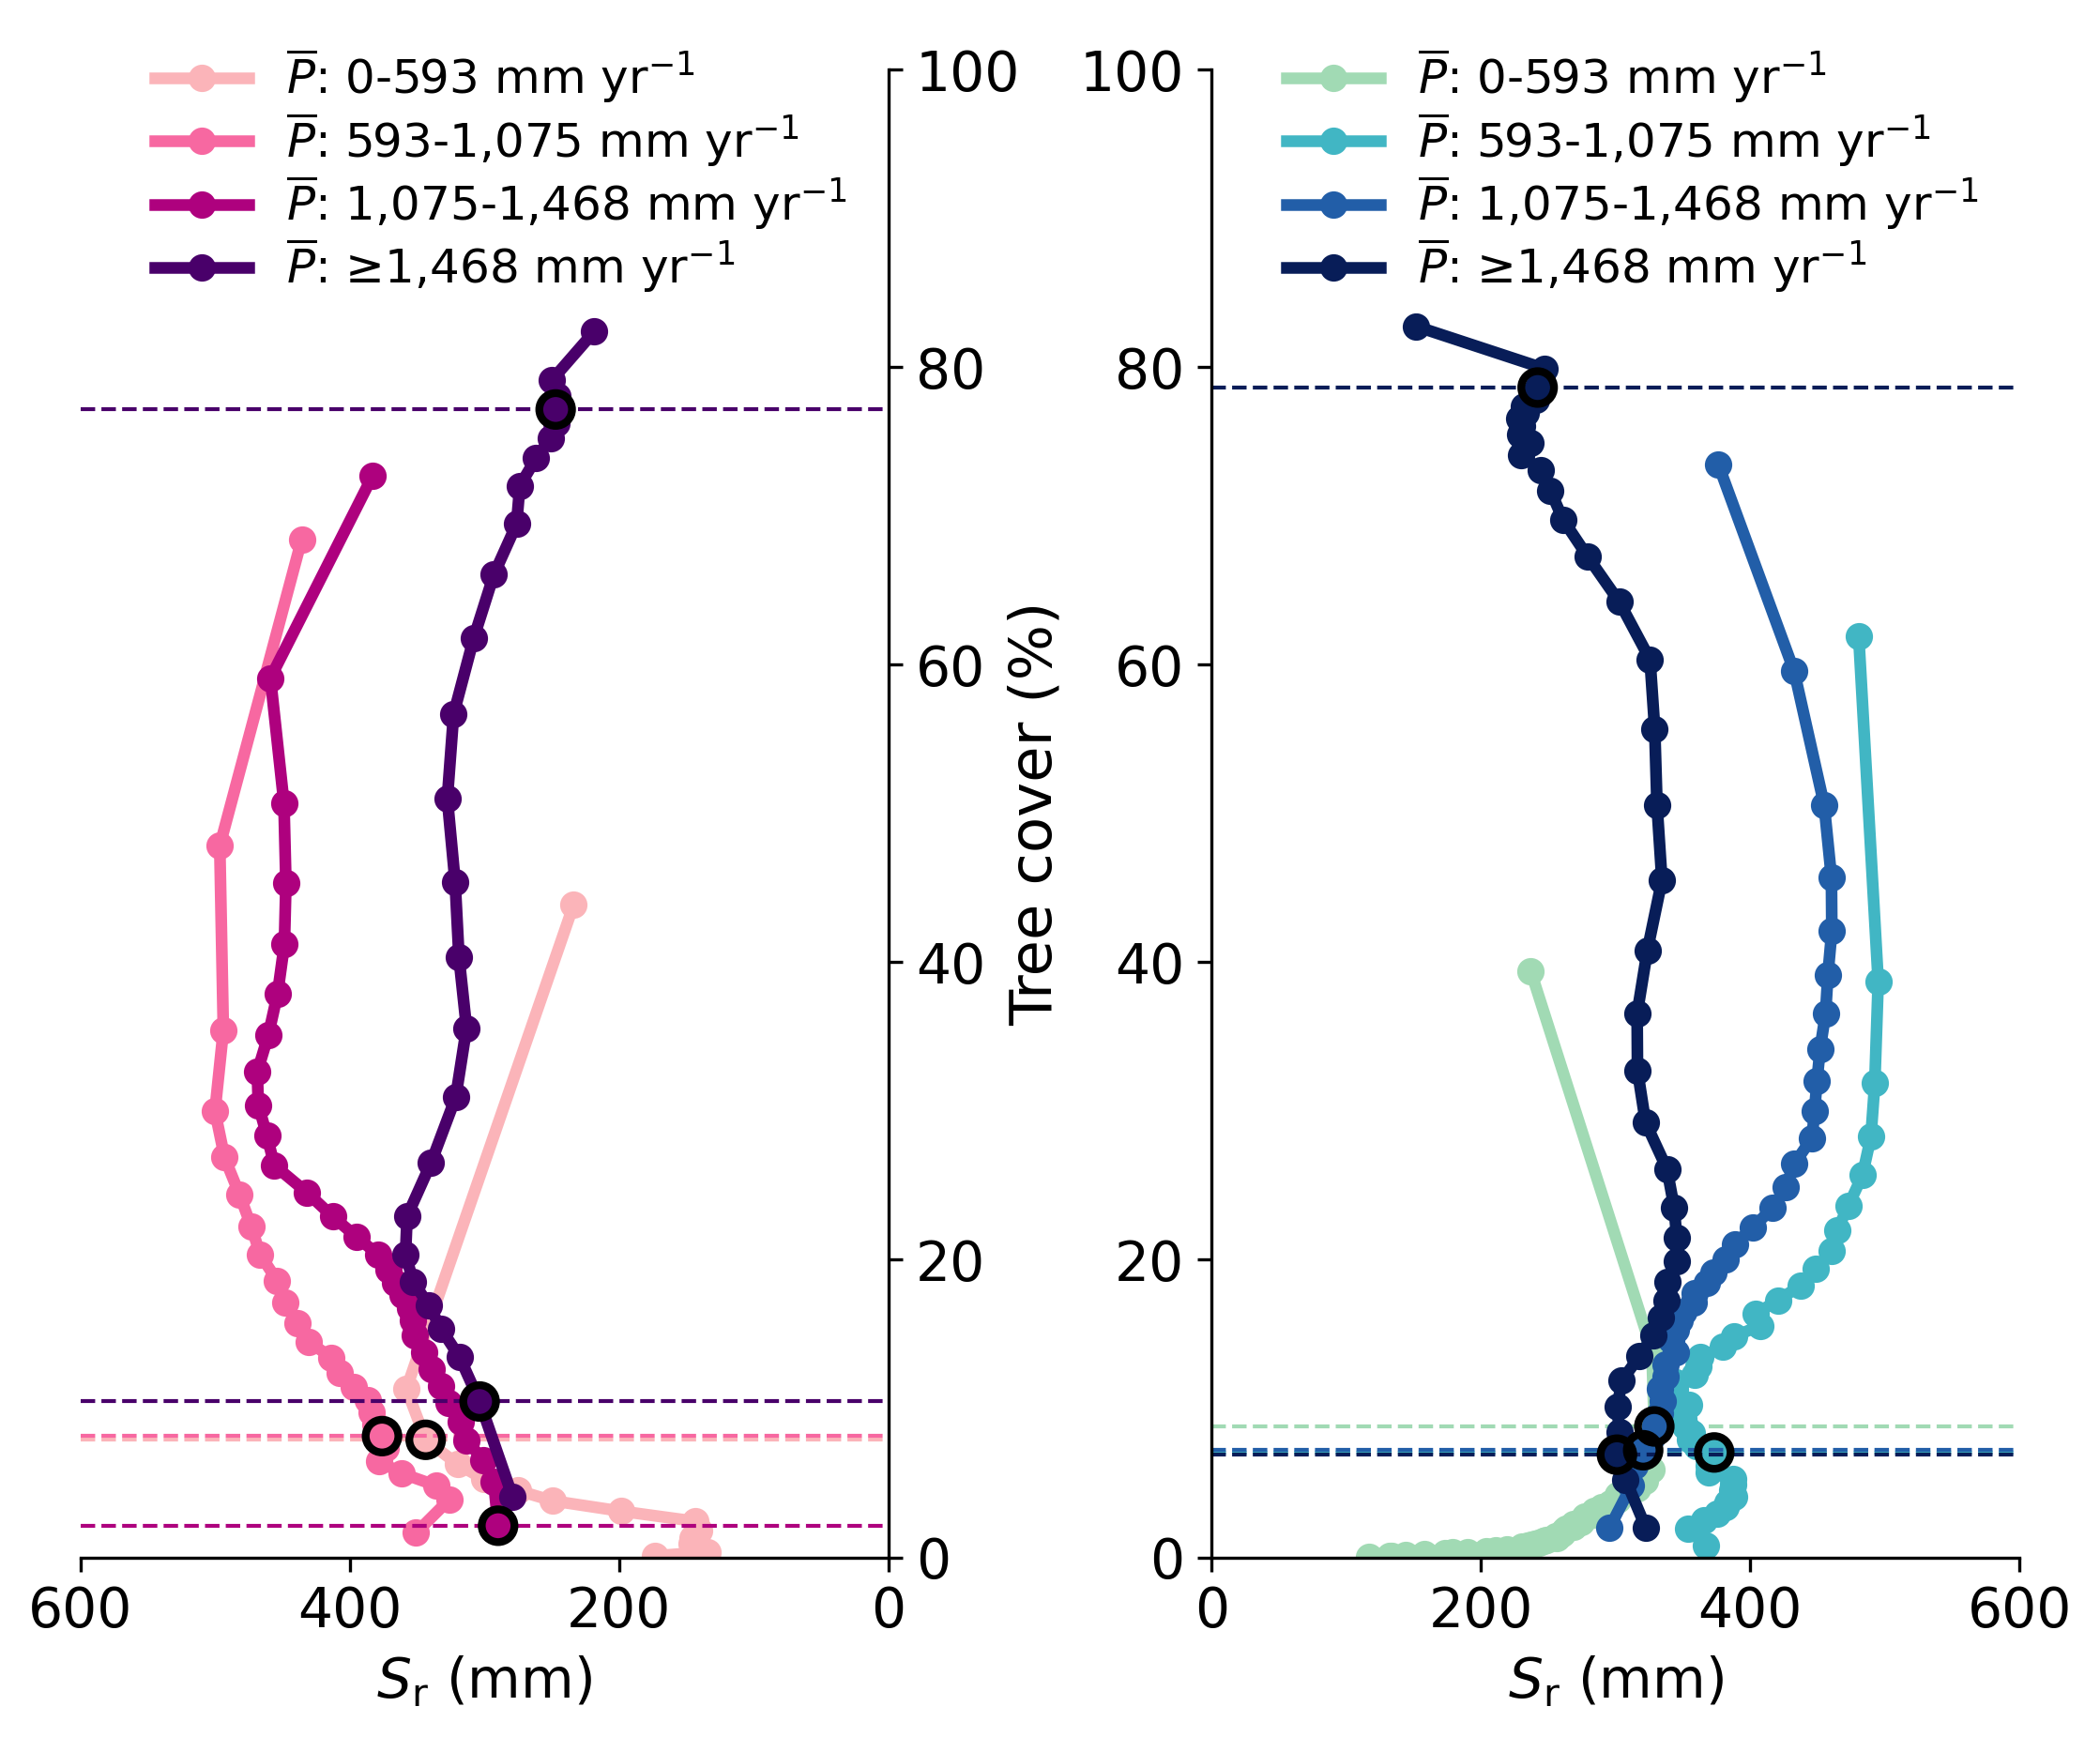

In [12]:
#for 38.2-13.8%
import matplotlib as mpl
import math
TC_threshold = 0 #if TC_threshold is 2, TC_change less than 2% and greater than -2% would be removed
color = ['#FC9272', '#99D8C9']
fig = plt.figure(figsize=(40,7), dpi = 300)
ax = [plt.subplot(181), plt.subplot(182, sharey = ax[0])]
fig.subplots_adjust(wspace=0.4)

color_l = ['#fbb4b9','#f768a1','#ae017e','#49006a']
color_g = ['#a1dab4','#41b6c4','#225ea8','#081d58']
    
for i in range(4):
    #----------
    dataframe = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1]) & (RZS_TC['TC_f-i'] < 0)).dropna()[['Mean_Treecover','Sr','MAP','TC_f-i']].sort_values(['Mean_Treecover'])
    a = np.insert(np.array(np.cumsum(Class.height.where(Class['class'] == 2*i+1).dropna())),0,0)
    Sr_append = []
    for j in range(len(a)-1):
        Sr_append.append(dataframe.Sr.where((dataframe.Mean_Treecover>=a[j]) &(dataframe.Mean_Treecover<a[j+1]) & (dataframe.MAP >= MAP_bins[i]) & (dataframe.MAP < MAP_bins[i+1])).dropna().median())
    if i == 3:
        ax[0].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+1).dropna(), lw=3, marker = 'o', color = color_l[i], label= r'$\overline{P}$'+': ≥'+str(format(math.trunc(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    else:
        ax[0].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+1).dropna(), lw=3, marker = 'o', color = color_l[i], label= r'$\overline{P}$'+': '+str(format(math.trunc(MAP_bins[i]),','))+'-'+str(format(math.trunc(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    ax[0].set_xlim(0,600)
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    ax[0].set_ylim(0,100)
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[0].set_xlabel(r'$S_{\mathrm{r}}$'+' (mm)', fontsize = '14')
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    df_temp = pd.DataFrame({'Sr':np.array(Sr_append).flatten(), 'TC': np.array(Class.y.where(Class['class'] == 2*i+1).dropna()).flatten()})
    
    df_l50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+1) & (Class_stable['y'] < 50)).dropna()
    if np.isnan(df_l50.y.max()) == False:
        ax[0].axhline(df_l50.y.max(), color = color_l[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_l50.y.max()).dropna())[0]
        ax[0].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
        
    df_g50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+1) & (Class_stable['y'] > 50)).dropna()
    if np.isnan(df_g50.y.min()) == False:
        ax[0].axhline(df_g50.y.min(), color = color_l[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_g50.y.min()).dropna())[0]
        ax[0].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
    
    
    
    #----------
    dataframe_1 = RZS_TC.where((RZS_TC.MAP >= MAP_bins[i]) & (RZS_TC.MAP < MAP_bins[i+1]) & (RZS_TC['TC_f-i'] >= 0)).dropna()[['Mean_Treecover','Sr','MAP','TC_f-i','Sr_ERA5_1999', 'Sr_ERA5_2019']].sort_values(['Mean_Treecover'])
    a = np.insert(np.array(np.cumsum(Class.height.where(Class['class'] == 2*i+2).dropna())),0,0)
    Sr_append = []
    for j in range(len(a)-1):
        Sr_append.append(dataframe_1.Sr.where((dataframe_1.Mean_Treecover>=a[j]) &(dataframe_1.Mean_Treecover<a[j+1]) & (dataframe_1.MAP >= MAP_bins[i]) & (dataframe_1.MAP < MAP_bins[i+1])).dropna().median())
    if i == 3:
        ax[1].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+2).dropna(), lw=3, marker = 'o', color = color_g[i], label= r'$\overline{P}$'+': ≥'+str(format(math.trunc(MAP_bins[i]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    else:
        ax[1].plot(np.array(Sr_append), Class.y.where(Class['class'] == 2*i+2).dropna(), lw=3, marker = 'o', color = color_g[i], label= r'$\overline{P}$'+': '+str(format(math.trunc(MAP_bins[i]),','))+'-'+str(format(math.trunc(MAP_bins[i+1]),','))+' mm '+r'$\mathrm{yr^{-1}}$')
    ax[1].set_xlim(0,600)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[1].set_xlabel(r'$S_{\mathrm{r}}$'+' (mm)', fontsize = '14')
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_ylim(0,100)
    
    df_temp = pd.DataFrame({'Sr':np.array(Sr_append).flatten(), 'TC': np.array(Class.y.where(Class['class'] == 2*i+2).dropna()).flatten()})
    
    df_l50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+2) & (Class_stable['y'] < 50)).dropna()
    if np.isnan(df_l50.y.max()) == False:
        ax[1].axhline(df_l50.y.max(), color = color_g[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_l50.y.max()).dropna())[0]
        ax[1].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
        
    df_g50 = Class_stable[['y']].where((Class_stable['class'] == 2*i+2) & (Class_stable['y'] > 50)).dropna()
    if np.isnan(df_g50.y.min()) == False:
        ax[1].axhline(df_g50.y.min(), color = color_g[i], linestyle = '--', lw = 1)
        x,y = np.array(df_temp.where(df_temp['TC'] == df_g50.y.min()).dropna())[0]
        ax[1].scatter(x,y, s = 70, zorder = 10, facecolors='none', edgecolors='black', lw = 2)
    
ax[1].set_ylabel('Tree cover (%)', fontsize = '15')
leg = ax[0].legend(bbox_to_anchor=(0.04, 0.82, 1., .102), fontsize = '12',labelspacing=0.1)
leg.get_frame().set_linewidth(0.0)
leg = ax[1].legend(bbox_to_anchor=(0.04, 0.82, 1., .102), fontsize = '12',labelspacing=0.1)
leg.get_frame().set_linewidth(0.0)